### Importing Libraries

In [1]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import ppscore as pps
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
plt.style.use('dark_background')

### Reading in data into pandas DataFrame

In [2]:
df = pd.read_csv('melb_data.csv')

#### Converting the date object into int64

In [3]:
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [4]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [5]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

#### Printing dataframe information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

#### Dropping null values and irrelevant features 

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop(['Lattitude','Longtitude','Address','Date'], axis=1, inplace=True)

In [9]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,Day,Month,Year
1,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0,2,4,2016
2,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0,3,4,2017
4,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Northern Metropolitan,4019.0,6,4,2016
6,Abbotsford,3,h,1876000.0,S,Nelson,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,Northern Metropolitan,4019.0,5,7,2016
7,Abbotsford,2,h,1636000.0,S,Nelson,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,Northern Metropolitan,4019.0,10,8,2016


#### Calculating the Predictive Power Score and plotting heatmap

In [10]:
def pps_heatmap(df):
    '''
        Function for calculating the Predictive Power Score and plotting a heatmap
            Args:
                Pandas DataFrame or Series object
            __________
            Returns:
                figure
    '''
    nuff = pps.matrix(df)
    nuff1 = nuff[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    plt.figure(figsize = (15, 8))
    ax = sb.heatmap(nuff1, vmin=0, vmax=1, cmap="Oranges_r", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

/opt/anaconda3/envs/ml_python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/envs/ml_python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/envs/ml_python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/envs/ml_python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/envs/ml_python/lib/python3.7/

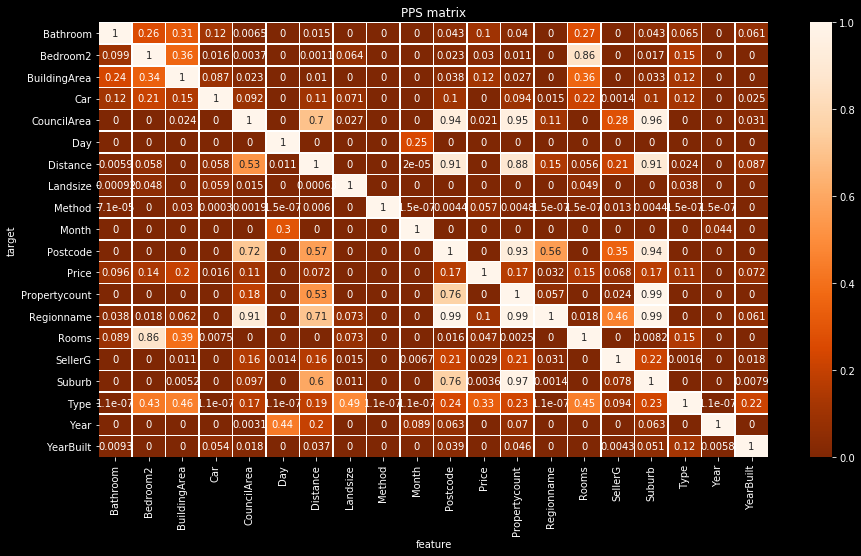

In [11]:
pps_heatmap(df)

#### Computing pairwise correlation

In [12]:
def correlation_matrix(df):
    plt.figure(figsize=(10, 8))
    sb.heatmap(df.corr(), annot=True, cmap='seismic_r')
    plt.show()
    return df.corr()

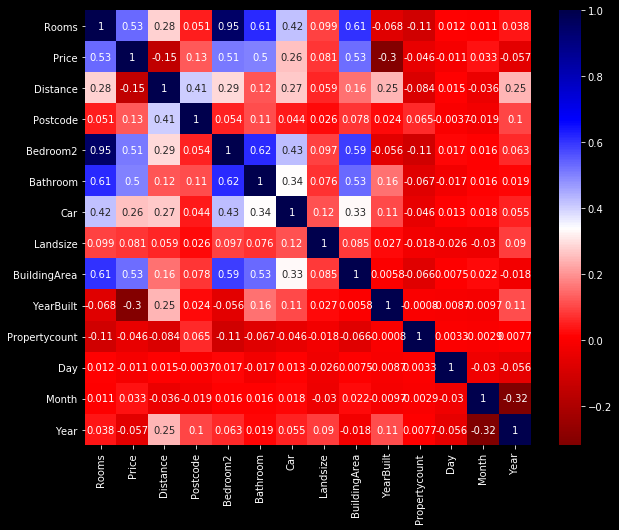

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Day,Month,Year
Rooms,1.000000,0.533505,0.283885,0.051237,0.951793,0.613853,0.422526,0.098755,0.608215,-0.068122,-0.111422,0.012032,0.011070,0.037554
Price,0.533505,1.000000,-0.148867,0.125539,0.514561,0.503922,0.261507,0.081419,0.530574,-0.304633,-0.046410,-0.011427,0.032784,-0.057392
Distance,0.283885,-0.148867,1.000000,0.405729,0.290242,0.124530,0.273615,0.059369,0.159603,0.246291,-0.083969,0.014591,-0.035891,0.245337
Postcode,0.051237,0.125539,0.405729,1.000000,0.053770,0.109804,0.043713,0.025807,0.078483,0.024375,0.064534,-0.003663,-0.018668,0.099726
Bedroom2,0.951793,0.514561,0.290242,0.053770,1.000000,0.617751,0.425726,0.097172,0.593000,-0.056343,-0.109401,0.016786,0.015774,0.063314
Bathroom,0.613853,0.503922,0.124530,0.109804,0.617751,1.000000,0.340808,0.076295,0.534425,0.157820,-0.067126,-0.016750,0.015723,0.019387
Car,0.422526,0.261507,0.273615,0.043713,0.425726,0.340808,1.000000,0.117647,0.334282,0.108714,-0.046487,0.013290,0.017677,0.054868
Landsize,0.098755,0.081419,0.059369,0.025807,0.097172,0.076295,0.117647,1.000000,0.084825,0.026518,-0.017784,-0.025934,-0.030199,0.090012
BuildingArea,0.608215,0.530574,0.159603,0.078483,0.593000,0.534425,0.334282,0.084825,1.000000,0.005836,-0.066144,0.007471,0.022158,-0.017641
YearBuilt,-0.068122,-0.304633,0.246291,0.024375,-0.056343,0.157820,0.108714,0.026518,0.005836,1.000000,-0.000797,-0.008698,-0.009712,0.110458


In [13]:
correlation_matrix(df)

In [14]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount', 'Day',
       'Month', 'Year'],
      dtype='object')

#### Data Preprocessing and Transformation

In [15]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Suburb','Type','Method', 'SellerG','CouncilArea', 'Regionname']), remainder='passthrough'
)
X = df[['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount', 'Day',
       'Month', 'Year']]
y = df[['Price']]

x = column_trans.fit_transform(X)

In [16]:
X = StandardScaler(with_mean=False).fit_transform(x)

In [17]:
y = StandardScaler().fit_transform(y)

In [18]:
model = LinearRegression()

In [19]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model.score(X, y)

0.7510729791826414

#### Splitting data into training and testing sets

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Performing predictions

In [23]:
y_pred = model.predict(x_test)

#### Computing the metrics of the model.

In [24]:
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [25]:
r_squared

0.7406794183489271

In [26]:
rmse

0.4863109597502585

#### Residual Analysis to Evaluate Model Performance

Root Mean Squared Error: Training Data 0.51
Root Mean Squared Error: Test Data 0.49
Coefficient of Determination R²: Training Data 0.75
Coefficient of Determination R²: Test Data 0.74


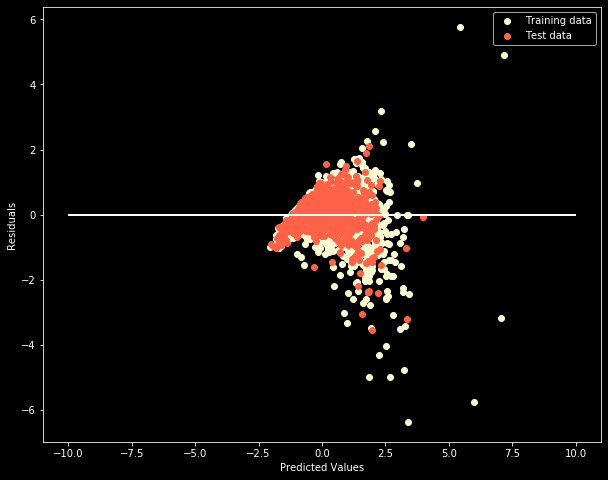

In [27]:
## prediction results ##
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
## Printing the rMSE and the R² score ##
print('Root Mean Squared Error: Training Data %.2f' % np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Root Mean Squared Error: Test Data %.2f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Coefficient of Determination R²: Training Data %.2f' %(r2_score(y_train, y_train_pred)))
print('Coefficient of Determination R²: Test Data %.2f' %(r2_score(y_test, y_test_pred)))
## Residual Analysis ##
plt.figure(figsize = (10, 8))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'lightgoldenrodyellow', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'tomato', label = 'Test data')
plt.hlines(y = 0, xmin = -10, xmax = 10, lw = 2, color = 'snow')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'best')
plt.show()